In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import librarys
#import things plan on using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#import models want to use including GMM-ASVM, XGBoost, elastic net methods, KNN algorithm, and the BiLSTM-CNN.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Dense, Flatten, Dropout
#import pca and other scaling selecting tools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score
# import SMOTE module from imblearn library to balance the yes and no exited
from imblearn.over_sampling import SMOTE



In [3]:
#load data set
churn = pd.read_csv('drive/MyDrive/datascience/semester 6/capstone project/Customer-Churn-Records.csv')

In [4]:
print(churn.shape)

(10000, 18)


In [5]:
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
print(churn.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [7]:
print(churn.isna().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [8]:
print(churn.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

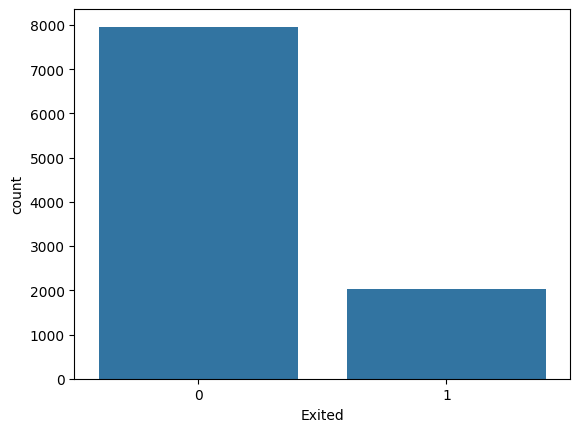

In [9]:
#see how many people churned
sns.countplot(data=churn, x='Exited')
plt.show()
#only about a quater churned data is imbalanced will have to work around that

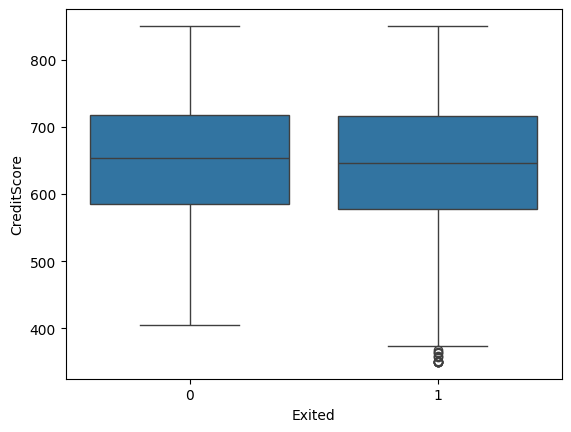

In [10]:
sns.boxplot(data=churn, x='Exited', y= 'CreditScore')
plt.show()
#people who churns credit scores are very similar to the ones that don't churn but have a slightly lower median and lower outliers as well

[1 0]


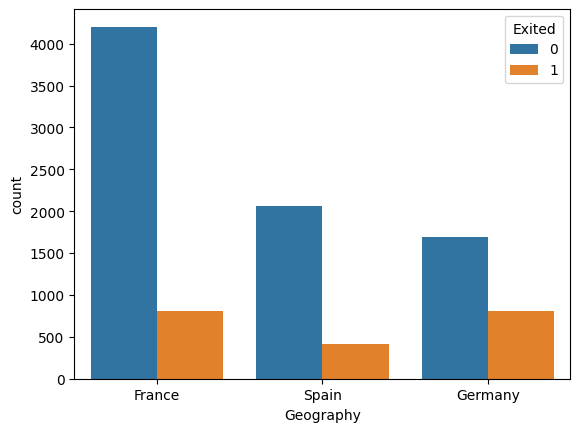

In [11]:
#from where are most bank customers
print(churn['Exited'].unique())
sns.countplot(data=churn, x='Geography', hue='Exited')
plt.show()
#most are from france but germany has the highest churn percentage

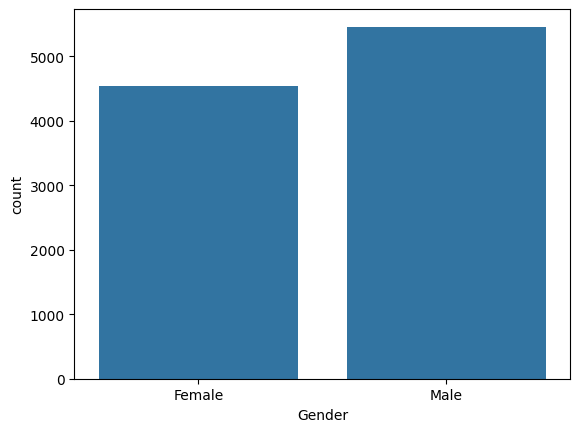

In [15]:
sns.countplot(data=churn, x='Gender')
plt.show()

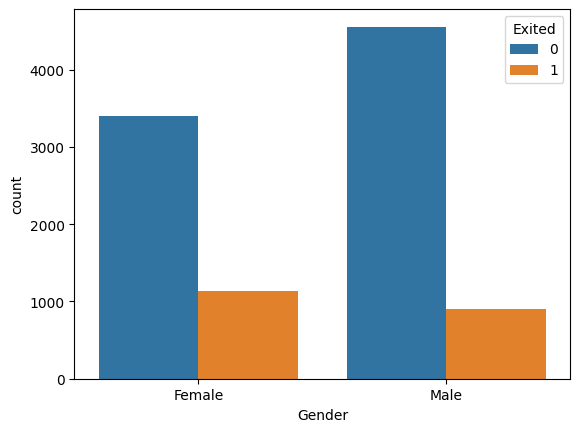

In [16]:
#which gender churns most
sns.countplot(data=churn, x='Gender', hue='Exited')
plt.show()
#more male customers overall but females churn more

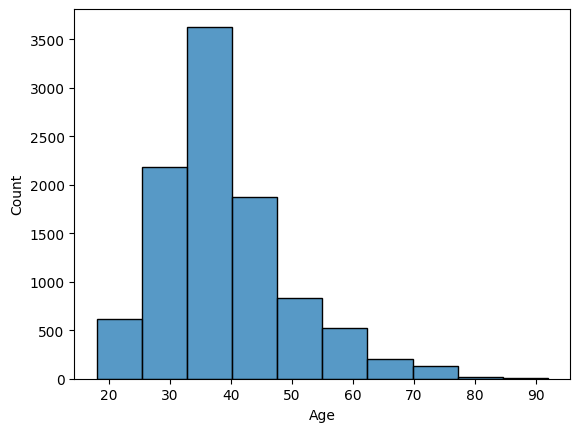

In [17]:
#which age most clients
sns.histplot(data=churn, x='Age',bins=10)
plt.show()

In [18]:
#divide dataset in two- one that did churn and one that didn't
yes_churn = churn[churn['Exited']== 1]
no_churn = churn[churn['Exited']== 0]

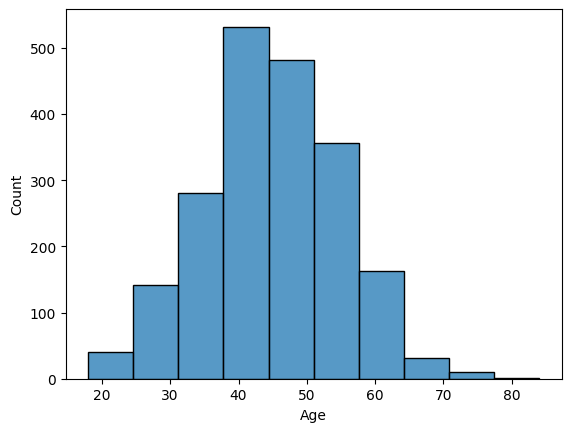

In [19]:
#which age most clients who churn
sns.histplot(data=yes_churn, x='Age', bins=10)
plt.show()

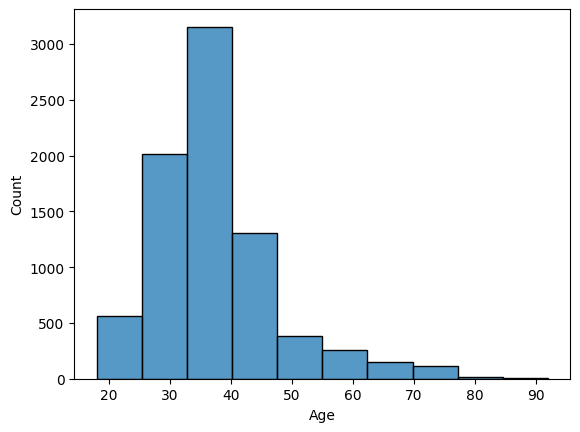

In [20]:
#which age most clients who don't churn
sns.histplot(data=no_churn, x='Age', bins=10)
plt.show()

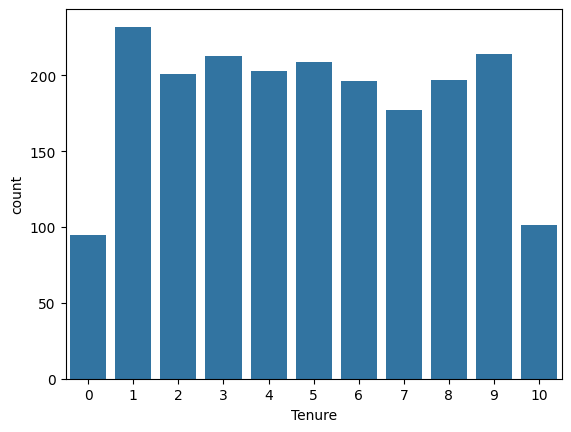

In [21]:
#tenure of most clients who  churn
sns.countplot(data=yes_churn, x='Tenure')
plt.show()
#one year tenure has the highest churn count with after that 9 years highest. seems like maybe some customers try it out for 1 year and leave and
# other highest get bored or move on after 9 years.

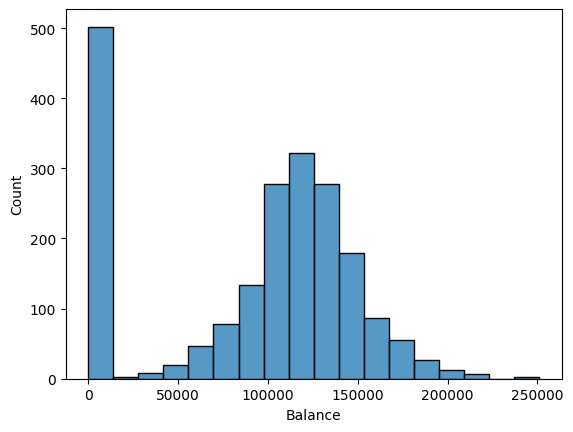

In [22]:
sns.histplot(data=yes_churn, x='Balance')
plt.show()
#largest # of people who churn have a 0 balance
#maybe incentivize customers keeping money in account as seems to reduce churn

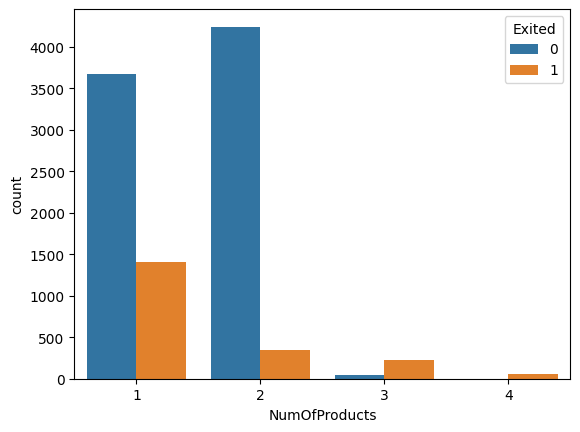

In [23]:
sns.countplot(data=churn, x='NumOfProducts', hue='Exited')
plt.show()
#intrestingly more customers with 3 or 4 products churned than without. maybe limit # of products to 2.

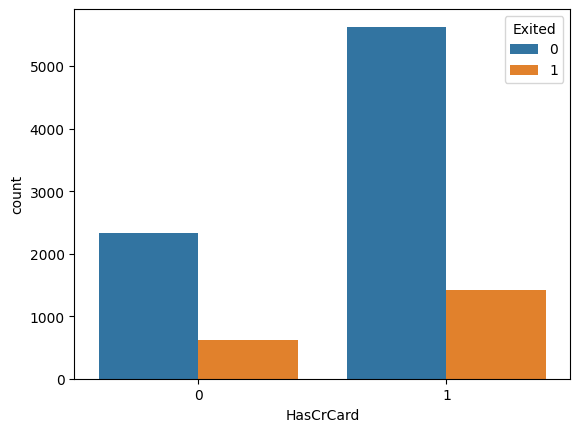

In [24]:
sns.countplot(data=churn, x='HasCrCard', hue='Exited')
plt.show()

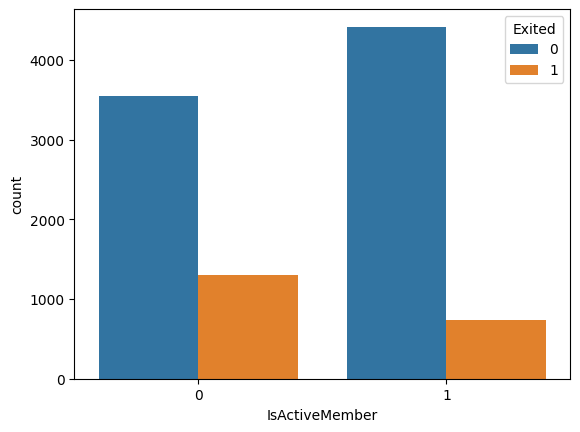

In [25]:
sns.countplot(data=churn, x='IsActiveMember', hue='Exited')
plt.show()
#seems like over half members aren't active. Try to see why that is and how do the measure if customer is active or not.

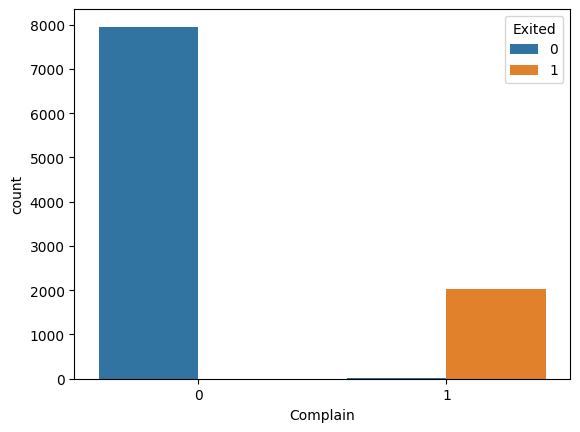

In [26]:
sns.countplot(data=churn, x='Complain', hue='Exited')
plt.show()
#most customers who complain end up churning. need to adress their complaints.

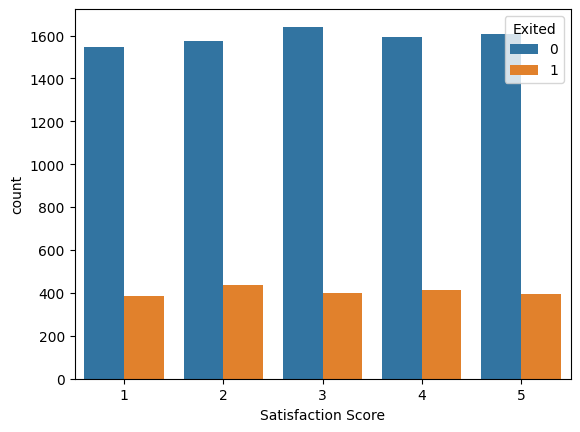

In [27]:
sns.countplot(data=churn, x='Satisfaction Score', hue='Exited')
plt.show()
#satisfaction score dosen't seem to be much of an indicator of churn. A satisfaction rate of 1 does not have
#visibly greater churn than a 5 sr.

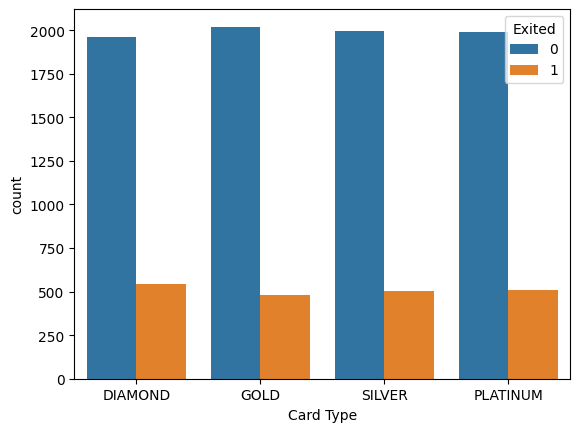

In [28]:
sns.countplot(data=churn, x='Card Type', hue='Exited')
plt.show()
#card types also don't seem to be much of difference although diamond card members do seem
#to churn bit more than others which is surprising

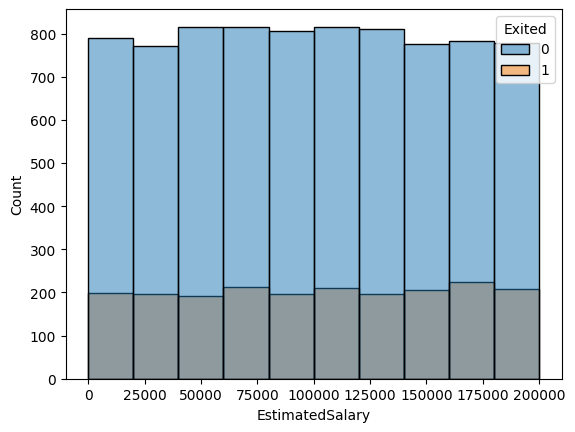

In [29]:
sns.histplot(data=churn, x='EstimatedSalary', hue='Exited', bins=10)
plt.show()
#salary is pretty evenly distributed and does not seem to make a big difference on churn

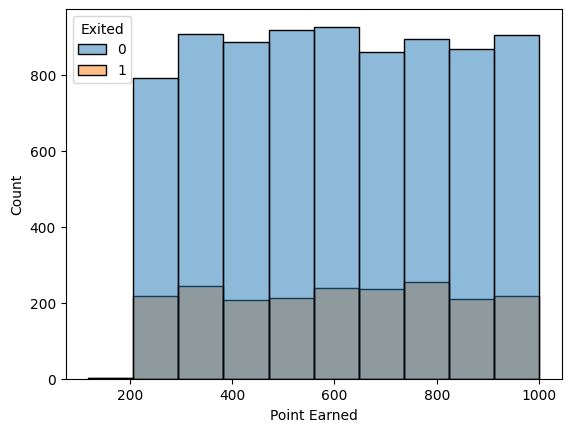

In [30]:
sns.histplot(data=churn, x='Point Earned', hue='Exited', bins=10)
plt.show()
#points earned does not seem to effect churn very much

['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


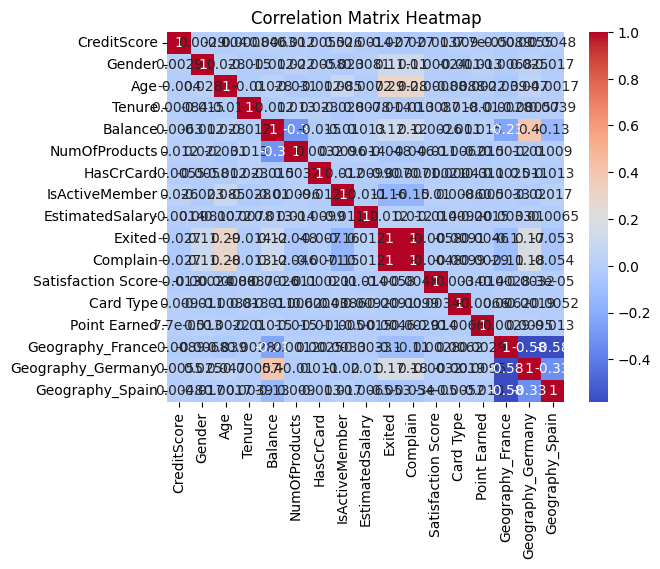

In [ ]:
#see correlation
#remove non applicable columns to do the correlation
churnCorr = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churnCorr = pd.get_dummies(churnCorr, columns=['Geography'])
#change male and female for 0 and 1
churnCorr['Gender'] = churn['Gender'].replace({'Male': 0, 'Female': 1})

#change each cardtype for a differnet number
print(churn['Card Type'].unique())
churnCorr['Card Type'] = churn['Card Type'].replace({'PLATINUM': 1, 'DIAMOND': 2, 'GOLD': 3, 'SILVER': 4})
# Calculate the correlation matrix
correlation_matrix = churnCorr.corr()
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#preprocess notebook

#remove columns not using
#remove non applicable columns to do the correlation also remove complain since it's too highly correlated
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname', 'Complain'], axis=1)

#map categorical variables to #s maybe do one hot encoding for georaphy cause it's not ordinal
#do one hot encoding for geography
churn = pd.get_dummies(churn, columns=['Geography'])

#change male and female for 0 and 1
churn['Gender'] = churn['Gender'].replace({'Male': 0, 'Female': 1})

#change each cardtype for a differnet number
print(churn['Card Type'].unique())
churn['Card Type'] = churn['Card Type'].replace({'PLATINUM': 1, 'DIAMOND': 2, 'GOLD': 3, 'SILVER': 4})
print(churn.head())

#Split data into testing and training sets.
X = churn.drop(['Exited'], axis=1)
y = churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#do seperate variable of balanced data
# import SMOTE module from imblearn library to balance the yes and no exited
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Satisfaction Score  Card Type  \
0               1        101348.88       1                   2          2   
1               1        112542.58       0                   3          2   
2               0        113931.57       1                   3          2   
3               0         93826.63       0                   5          3   
4               1         79084.10       0                   5          3   

   Point Earned  Geography_France  Geogra

In [ ]:
#create function that tries all models

def try_models(X_train, y_train,X_test, y_test):
    scores = []
    models = [
        GaussianNB(),
        SVC(random_state=42),
        KNeighborsClassifier(),
        LogisticRegression(random_state=42),
        RandomForestClassifier(random_state=42),
        XGBClassifier(random_state=42),
        GaussianMixture(random_state=42)
    ]

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        score = {
            'model': model.__class__.__name__,
            'cm': cm,
            'f1': f1,
            'recall': recall,
            'precision': precision,
            'accuracy': accuracy,
            'auc' : auc
        }
        scores.append(score)

    df = pd.DataFrame(scores)
    # Apply table styles
    styles = [{'selector': 'th', 'props': [('text-align', 'center')]}]
    styled_df = df.style.set_table_styles(styles)
    # Display the styled DataFrame
    styled_df

    return styled_df

In [ ]:
try_models(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,cm,f1,recall,precision,accuracy,auc
0,GaussianNB,[[1555 52] [ 366 27]],0.114407,0.068702,0.341772,0.791000,0.518172
1,SVC,[[1607 0] [ 393 0]],0.000000,0.000000,0.000000,0.803500,0.500000
2,KNeighborsClassifier,[[1494 113] [ 357 36]],0.132841,0.091603,0.241611,0.765000,0.510643
3,LogisticRegression,[[1569 38] [ 363 30]],0.130152,0.076336,0.441176,0.799500,0.526345
4,RandomForestClassifier,[[1550 57] [ 219 174]],0.557692,0.442748,0.753247,0.862000,0.703639
5,XGBClassifier,[[1511 96] [ 192 201]],0.582609,0.511450,0.676768,0.856000,0.725856
6,GaussianMixture,[[1607 0] [ 393 0]],0.000000,0.000000,0.000000,0.803500,0.500000


In [ ]:
try_models(X_train_res, y_train_res, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,cm,f1,recall,precision,accuracy,auc
0,GaussianNB,[[1073 534] [ 117 276]],0.458853,0.702290,0.340741,0.674500,0.684997
1,SVC,[[ 606 1001] [ 96 297]],0.351271,0.755725,0.228814,0.451500,0.566413
2,KNeighborsClassifier,[[983 624] [230 163]],0.276271,0.414758,0.207116,0.573000,0.513229
3,LogisticRegression,[[1013 594] [ 126 267]],0.425837,0.679389,0.310105,0.640000,0.654878
4,RandomForestClassifier,[[1458 149] [ 168 225]],0.586701,0.572519,0.601604,0.841500,0.739900
5,XGBClassifier,[[1437 170] [ 158 235]],0.588972,0.597964,0.580247,0.836000,0.746089
6,GaussianMixture,[[1607 0] [ 393 0]],0.000000,0.000000,0.000000,0.803500,0.500000


In [ ]:
try_models(X_train_scaled, y_train, X_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,cm,f1,recall,precision,accuracy,auc
0,GaussianNB,[[1503 104] [ 240 153]],0.470769,0.389313,0.595331,0.828000,0.662298
1,SVC,[[1563 44] [ 243 150]],0.511073,0.381679,0.773196,0.856500,0.677150
2,KNeighborsClassifier,[[1522 85] [ 258 135]],0.440457,0.343511,0.613636,0.828500,0.645309
3,LogisticRegression,[[1544 63] [ 313 80]],0.298507,0.203562,0.559441,0.812000,0.582179
4,RandomForestClassifier,[[1553 54] [ 219 174]],0.560386,0.442748,0.763158,0.863500,0.704573
5,XGBClassifier,[[1511 96] [ 192 201]],0.582609,0.511450,0.676768,0.856000,0.725856
6,GaussianMixture,[[1607 0] [ 393 0]],0.000000,0.000000,0.000000,0.803500,0.500000


In [ ]:
#try rfe and pca on weighted data
#pca
pca = PCA()
#scale for pca
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#test dropping features from model using rfe 1-13 and graph the accurracy after droping features
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []
num_features = []
for x in range(1,14):
  rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=x)
  rfe.fit(X_train_res, y_train_res)
  selected_features = X_train.columns[rfe.support_]
  X_train_selected = rfe.transform(X_train_res)
  X_test_selected = rfe.transform(X_test)
  model= RandomForestClassifier(random_state=42)
  model.fit(X_train_selected, y_train_res)
  y_pred = model.predict(X_test_selected)
  cm = confusion_matrix(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  num_features.append(x)
  f1_scores.append(f1)
  recall_scores.append(recall)
  precision_scores.append(precision)
  accuracy_scores.append(accuracy)

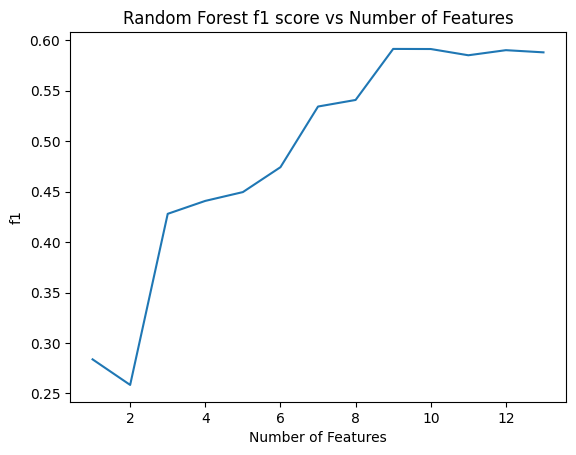

In [ ]:
# Create a DataFrame for plotting recall
results_f1 = pd.DataFrame({'num_features': num_features, 'f1': f1_scores})
#line graph of score
plt.plot(results_f1['num_features'], results_f1['f1'])
plt.xlabel('Number of Features')
plt.ylabel('f1')
plt.title('Random Forest f1 score vs Number of Features')
plt.show()

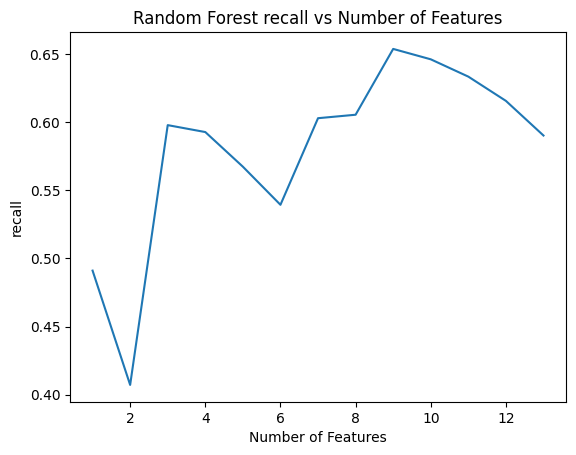

In [ ]:
# Create a DataFrame for plotting f1
results_recall = pd.DataFrame({'num_features': num_features, 'recall': recall_scores})
#line graph of score
plt.plot(results_recall['num_features'], results_recall['recall'])
plt.xlabel('Number of Features')
plt.ylabel('recall')
plt.title('Random Forest recall vs Number of Features')
plt.show()

In [ ]:
#test dropping features from xgb model using rfe 1-13 and graph the accurracy after droping features
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []
num_features = []
for x in range(1,14):
  rfe = RFE(estimator=XGBClassifier(random_state=42), n_features_to_select=x)
  rfe.fit(X_train_res, y_train_res)
  selected_features = X_train.columns[rfe.support_]
  X_train_selected = rfe.transform(X_train_res)
  X_test_selected = rfe.transform(X_test)
  model= XGBClassifier(random_state=42)
  model.fit(X_train_selected, y_train_res)
  y_pred = model.predict(X_test_selected)
  cm = confusion_matrix(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  num_features.append(x)
  f1_scores.append(f1)
  recall_scores.append(recall)
  precision_scores.append(precision)
  accuracy_scores.append(accuracy)

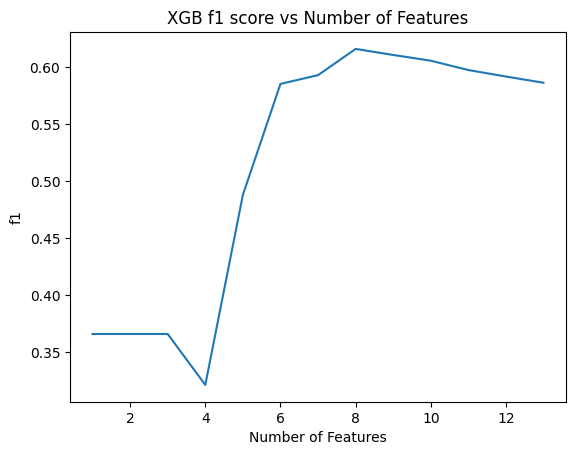

In [ ]:
# Create a DataFrame for plotting recall
results_f1 = pd.DataFrame({'num_features': num_features, 'f1': f1_scores})
#line graph of score
plt.plot(results_f1['num_features'], results_f1['f1'])
plt.xlabel('Number of Features')
plt.ylabel('f1')
plt.title('XGB f1 score vs Number of Features')
plt.show()

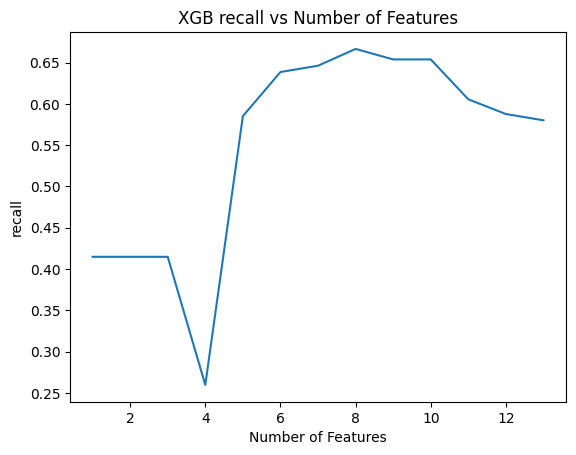

In [ ]:
# Create a DataFrame for plotting f1
results_recall = pd.DataFrame({'num_features': num_features, 'recall': recall_scores})
#line graph of score
plt.plot(results_recall['num_features'], results_recall['recall'])
plt.xlabel('Number of Features')
plt.ylabel('recall')
plt.title('XGB recall vs Number of Features')
plt.show()

In [ ]:
#try3 models on pca data and xgb and random forest with dropped columns

In [ ]:
#random forest
randomforestmodel = RandomForestClassifier(random_state=42)


#try on 2 versions of dataset
#regular data
rf_rfe_scores = []
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=9)
selector = rfe.fit(X_train_res, y_train_res)
#transform data using only top features
X_train_selected_rf = rfe.transform(X_train_res)
X_test_selected_rf = rfe.transform(X_test)
#run model and see if dosen't overfit anymore
randomforestmodel.fit(X_train_selected_rf, y_train_res)

#get metrics and add to table
y_pred = randomforestmodel.predict(X_test_selected_rf)
cm = confusion_matrix(y_test, y_pred)
print(cm)
rf_rfe_scores.append(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
rf_rfe_scores.append(f1)
recall = recall_score(y_test, y_pred)
print(recall)
rf_rfe_scores.append(recall)
precision = precision_score(y_test, y_pred)
print(precision)
rf_rfe_scores.append(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
rf_rfe_scores.append(accuracy)

[[1388  219]
 [ 136  257]]
0.5914844649021864
0.6539440203562341
0.5399159663865546
0.8225


In [ ]:
selected_features_mask = rfe.support_
selected_features = X_train_res.columns[selected_features_mask]
print("Selected Features:", selected_features)

Selected Features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Point Earned',
       'Geography_Germany'],
      dtype='object')


In [ ]:
# Create a DataFrame
df = pd.DataFrame(selected_features)

# Apply table styles
styles = [{'selector': 'th', 'props': [('text-align', 'center')]}]
styled_df = df.style.set_table_styles(styles)

# Display the styled DataFrame
styled_df

,0
0,CreditScore
1,Age
2,Tenure
3,Balance
4,NumOfProducts
5,IsActiveMember
6,EstimatedSalary
7,Point Earned
8,Geography_Germany


In [ ]:
#pca data
rf_pca_scores = []
#run model and see if dosen't overfit anymore
randomforestmodel.fit(X_train_pca, y_train_res)

#get metrics and add to table
y_pred = randomforestmodel.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print(cm)
rf_pca_scores.append(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
rf_pca_scores.append(f1)
recall = recall_score(y_test, y_pred)
print(recall)
rf_pca_scores.append(recall)
precision = precision_score(y_test, y_pred)
print(precision)
rf_pca_scores.append(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
rf_pca_scores.append(accuracy)

[[1485  122]
 [ 181  212]]
0.5832187070151307
0.539440203562341
0.6347305389221557
0.8485


In [ ]:
#xgboost
xgbmodel = XGBClassifier(random_state=42)

#rfe data
rfe = RFE(xgbmodel, n_features_to_select=8)
selector = rfe.fit(X_train_res, y_train_res)
#transform data using only top features
X_train_selected_xgb = rfe.transform(X_train_res)
X_test_selected_xgb = rfe.transform(X_test)
#run model and see if dosen't overfit anymore
xgbmodel.fit(X_train_selected_xgb, y_train_res)

#get metrics and add to table
y_pred = xgbmodel.predict(X_test_selected_xgb)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
rfe_scores_xgb = [cm, f1, recall, precision, accuracy]

[[1411  196]
 [ 131  262]]
0.6157461809635723
0.6666666666666666
0.5720524017467249
0.8365


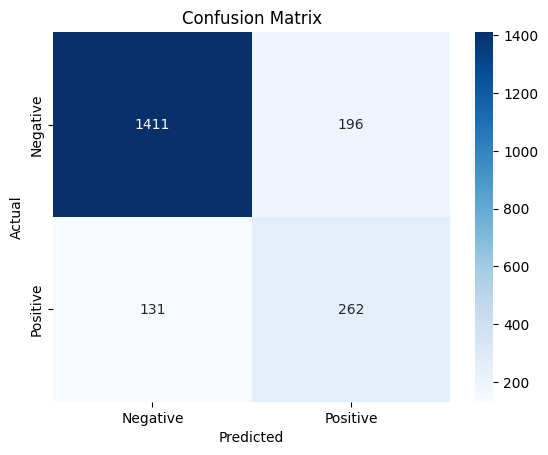

In [ ]:
#output consusion matrix in nice format
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#label positive and negitive instead of 0 and 1
#align the labels to each box

plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
selected_features_mask = rfe.support_
selected_features = X_train_res.columns[selected_features_mask]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [ ]:
# Create a DataFrame
df = pd.DataFrame(selected_features)

# Apply table styles
styles = [{'selector': 'th', 'props': [('text-align', 'center')]}]
styled_df = df.style.set_table_styles(styles)

# Display the styled DataFrame
styled_df

,0
0,Age
1,Balance
2,NumOfProducts
3,HasCrCard
4,IsActiveMember
5,Geography_France
6,Geography_Germany
7,Geography_Spain


In [ ]:
#pca data
xgbmodel.fit(X_train_pca, y_train_res)

#get metrics and add to table
y_pred = xgbmodel.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
pca_scores_xgb = [cm, f1, recall, precision, accuracy]

[[1448  159]
 [ 172  221]]
0.571798188874515
0.5623409669211196
0.5815789473684211
0.8345


In [ ]:
#svc
svc = SVC(random_state=42)

#pca data
svc.fit(X_train_pca, y_train_res)
#get metrics and add to table
y_pred = svc.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
pca_scores_svc = [cm, f1, recall, precision, accuracy]


[[1461  146]
 [ 170  223]]
0.5853018372703411
0.5674300254452926
0.6043360433604336
0.842


In [ ]:
#try on weighted data
svc.fit(X_train_res, y_train_res)
#get metrics and add to table
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
weg_scores_svc = [cm, f1, recall, precision, accuracy]

[[ 606 1001]
 [  96  297]]
0.3512714370195151
0.7557251908396947
0.2288135593220339
0.4515


In [ ]:
titles = ['cm', 'f1', 'recall', 'precision','accuracy' ]
# Create a DataFrame
modelscores = pd.DataFrame(index=titles)
modelscores.insert(0, 'rfe random forest', rf_rfe_scores)
modelscores.insert(1, 'pca random forest', rf_pca_scores)
modelscores.insert(2, 'rfe xgb', rfe_scores_xgb)
modelscores.insert(3, 'pca xgb', pca_scores_xgb)
modelscores.insert(4, 'pca svc', pca_scores_svc)
modelscores.insert(4, 'weg svc', weg_scores_svc)

# Apply table styles
styles = [{'selector': 'th', 'props': [('text-align', 'center')]}]
modelscores = modelscores.style.set_table_styles(styles)

# Display the styled DataFrame
modelscores

,rfe random forest,pca random forest,rfe xgb,pca xgb,weg svc,pca svc
cm,[[1388 219] [ 136 257]],[[1485 122] [ 181 212]],[[1411 196] [ 131 262]],[[1448 159] [ 172 221]],[[ 606 1001] [ 96 297]],[[1461 146] [ 170 223]]
f1,0.591484,0.583219,0.615746,0.571798,0.351271,0.585302
recall,0.653944,0.539440,0.666667,0.562341,0.755725,0.567430
precision,0.539916,0.634731,0.572052,0.581579,0.228814,0.604336
accuracy,0.822500,0.848500,0.836500,0.834500,0.451500,0.842000


In [ ]:
#parameter selection
#random forest
rfmodel = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(rfmodel, param_grid, cv=5)
grid_search_rf.fit(X_train_selected_rf, y_train_res)
best_params_randomforest = grid_search_rf.best_params_
print(best_params_randomforest)
best_score = grid_search_rf.best_score_
print(best_score)
#evaluate on test set
y_pred = grid_search_rf.predict(X_test_selected_rf)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
rf_scores_gridsearch = [cm, f1, recall, precision, accuracy]

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8601101494885915
[[1388  219]
 [ 136  257]]
0.5914844649021864
0.6539440203562341
0.5399159663865546
0.8225


In [ ]:
best_params_randomforest = pd.DataFrame.from_dict(best_params_randomforest, orient='index')
#set the index as randomforest instead of 0
best_params_randomforest.columns = ['random forest']
print(best_params_randomforest)

                   random forest
max_depth                    NaN
min_samples_leaf             1.0
min_samples_split            2.0
n_estimators               100.0


In [ ]:
# grid search cv on xgboost
xgbmodel = XGBClassifier(random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search_xgb = GridSearchCV(xgbmodel, param_grid, cv=5)
grid_search_xgb.fit(X_train_pca, y_train_res)
best_params_xgb = grid_search_xgb.best_params_
print(best_params_xgb)
best_score_xgb = grid_search_xgb.best_score_
print(best_score_xgb)
#evaluate on test set
y_pred = grid_search_xgb.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
xgb_scores_gridsearch = [cm, f1, recall, precision, accuracy]

{'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
0.8616050354051928
[[1434  173]
 [ 172  221]]
0.5616264294790343
0.5623409669211196
0.5609137055837563
0.8275


In [ ]:
best_params_xgb = pd.DataFrame.from_dict(best_params_xgb, orient='index')
#set the index as randomforest instead of 0
best_params_xgb.columns = ['xgb']
print(best_params_xgb)

                    xgb
colsample_bytree    0.9
learning_rate       0.2
max_depth           5.0
n_estimators      200.0
subsample           0.8


In [ ]:
#grid search on svc
svcmodel = SVC(random_state=42)
param_grid = {
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
grid_search_svc = GridSearchCV(svcmodel, param_grid, cv=5)
grid_search_svc.fit(X_train_res, y_train_res)
best_params_svc = grid_search_svc.best_params_
print(best_params_svc)
best_score_svc = grid_search_svc.best_score_
print(best_score_svc)
#evaluate on test set
y_pred = grid_search_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
svc_scores_gridsearch = [cm, f1, recall, precision, accuracy]

In [ ]:
best_params_svc = pd.DataFrame.f
rom_dict(best_params_svc, orient='columns')
#set the index as randomforest instead of 0
best_params_svc.columns = ['svc']
print(best_params_svc)

In [ ]:
# Concatenate DataFrames along columns (axis=1)
combined_df = pd.concat([best_params_randomforest, best_params_xgb, best_params_svc],axis=1)

# Display the combined DataFrame
#print(combined_df)
combined_df_cleaned = combined_df.fillna('')

print(combined_df_cleaned)

In [ ]:
print(rf_scores_gridsearch)
print(xgb_scores_gridsearch)
print(svc_scores_gridsearch)

In [ ]:
# Define the CNN model
tfmodel = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 5, activation='relu', input_shape=(X_train_res.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
tfmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Check class distribution in the training data
unique, counts = np.unique(y_train_res, return_counts=True)
print("Training data distribution:", dict(zip(unique, counts)))

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Reshape X_train to (n_samples, n_features, 1) for 1D convolution
X_train_reshaped = np.expand_dims(X_train_res, axis=-1)

# Fit the model on training data with class weights
history = tfmodel.fit(X_train_reshaped, y_train_res, epochs=25, batch_size=32, validation_split=0.2, class_weight=class_weights)

# Evaluate the model on test data
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)
X_test_reshaped = np.expand_dims(X_test, axis=-1)  # Ensure the test data is reshaped correctly

# Predict using the model
y_pred_probs = tfmodel.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Compute and print other evaluation metrics
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Store the metrics
weg_scores_tf = [cm, f1, recall, precision, accuracy]


In [ ]:
#scaled tf model
# Check class distribution in the training data
unique, counts = np.unique(y_train, return_counts=True)
print("Training data distribution:", dict(zip(unique, counts)))

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Reshape X_train to (n_samples, n_features, 1) for 1D convolution
X_train_reshaped = np.expand_dims(X_train_scaled, axis=-1)

# Fit the model on training data with class weights
history = tfmodel.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_split=0.2, class_weight=class_weights)

# Evaluate the model on test data
X_test = np.array(X_test_scaled, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)
X_test_reshaped = np.expand_dims(X_test, axis=-1)  # Ensure the test data is reshaped correctly

# Predict using the model
y_pred_probs = tfmodel.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Compute and print other evaluation metrics
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Store the metrics
scaled_scores_tf = [cm, f1, recall, precision, accuracy]


In [ ]:
#regular tf model
# Check class distribution in the training data
unique, counts = np.unique(y_train, return_counts=True)
print("Training data distribution:", dict(zip(unique, counts)))

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Reshape X_train to (n_samples, n_features, 1) for 1D convolution
X_train_reshaped = np.expand_dims(X_train, axis=-1)

# Fit the model on training data with class weights
history = tfmodel.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_split=0.2, class_weight=class_weights)

# Evaluate the model on test data
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)
X_test_reshaped = np.expand_dims(X_test, axis=-1)  # Ensure the test data is reshaped correctly

# Predict using the model
y_pred_probs = tfmodel.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Compute and print other evaluation metrics
f1 = f1_score(y_test, y_pred)
print(f1)
recall = recall_score(y_test, y_pred)
print(recall)
precision = precision_score(y_test, y_pred)
print(precision)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Store the metrics
reg_scores_tf = [cm, f1, recall, precision, accuracy]

In [ ]:

titles = ['cm', 'f1', 'recall', 'precision','accuracy' ]
# Create a DataFrame
cnn = pd.DataFrame(index=titles)
cnn.insert(0, 'regular', reg_scores_tf)
cnn.insert(1, 'scaled', scaled_scores_tf)
cnn.insert(2, 'weighted', weg_scores_tf)

# Apply table styles
styles = [{'selector': 'th', 'props': [('text-align', 'center')]}]
cnn= cnn.style.set_table_styles(styles)

# Display the styled DataFrame
cnn